### Amazon Stock Price prediction using *GRU*

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
dataset = pd.read_csv(r"/content/drive/MyDrive/DS Project/Amazon Price Prediction /AMZNtrain.csv")

In [8]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500
...,...,...,...,...,...,...,...
1253,2018-12-24,1346.000000,1396.030029,1307.000000,1343.959961,1343.959961,7220000
1254,2018-12-26,1368.890015,1473.160034,1363.010010,1470.900024,1470.900024,10411800
1255,2018-12-27,1454.199951,1469.000000,1390.310059,1461.640015,1461.640015,9722000
1256,2018-12-28,1473.349976,1513.469971,1449.000000,1478.020020,1478.020020,8829000


In [9]:
dataset.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [10]:
#convert date into pandas datetime format

dataset["Date"] = pd.to_datetime(dataset["Date"])

In [11]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500
...,...,...,...,...,...,...,...
1253,2018-12-24,1346.000000,1396.030029,1307.000000,1343.959961,1343.959961,7220000
1254,2018-12-26,1368.890015,1473.160034,1363.010010,1470.900024,1470.900024,10411800
1255,2018-12-27,1454.199951,1469.000000,1390.310059,1461.640015,1461.640015,9722000
1256,2018-12-28,1473.349976,1513.469971,1449.000000,1478.020020,1478.020020,8829000


In [12]:
dataset.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [13]:
dataset["Date"].dt.year

,Date
0,2014
1,2014
2,2014
3,2014
4,2014
...,...
1253,2018
1254,2018
1255,2018
1256,2018


In [14]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500
...,...,...,...,...,...,...,...
1253,2018-12-24,1346.000000,1396.030029,1307.000000,1343.959961,1343.959961,7220000
1254,2018-12-26,1368.890015,1473.160034,1363.010010,1470.900024,1470.900024,10411800
1255,2018-12-27,1454.199951,1469.000000,1390.310059,1461.640015,1461.640015,9722000
1256,2018-12-28,1473.349976,1513.469971,1449.000000,1478.020020,1478.020020,8829000


In [15]:
#Based on the previous days stock prices predict the next day stock price

In [16]:
dataset = dataset[["Date","Open"]]

In [17]:
dataset

,Date,Open
0,2014-01-02,398.799988
1,2014-01-03,398.290009
2,2014-01-06,395.850006
3,2014-01-07,395.040009
4,2014-01-08,398.470001
...,...,...
1253,2018-12-24,1346.000000
1254,2018-12-26,1368.890015
1255,2018-12-27,1454.199951
1256,2018-12-28,1473.349976


In [18]:
dataset = dataset.sample(frac = 1)

In [19]:
dataset

,Date,Open
603,2016-05-25,708.000000
128,2014-07-08,333.100006
597,2016-05-17,709.900024
850,2017-05-18,944.799988
227,2014-11-25,335.269989
...,...,...
822,2017-04-07,899.650024
950,2017-10-10,996.669983
82,2014-05-01,304.130005
381,2015-07-09,434.899994


In [20]:
dataset.set_index("Date", inplace = True)

In [21]:
dataset

,Open
Date,
2016-05-25,708.000000
2014-07-08,333.100006
2016-05-17,709.900024
2017-05-18,944.799988
2014-11-25,335.269989
...,...
2017-04-07,899.650024
2017-10-10,996.669983
2014-05-01,304.130005


In [22]:
#sort_index -- to sort by date -- to maintain the sequntial data
dataset.sort_index(inplace = True)

In [23]:
dataset

,Open
Date,
2014-01-02,398.799988
2014-01-03,398.290009
2014-01-06,395.850006
2014-01-07,395.040009
2014-01-08,398.470001
...,...
2018-12-24,1346.000000
2018-12-26,1368.890015
2018-12-27,1454.199951


In [24]:
dataset.isnull().any()

,0
Open,False


###### Check for gaps

In [25]:
dataset

,Open
Date,
2014-01-02,398.799988
2014-01-03,398.290009
2014-01-06,395.850006
2014-01-07,395.040009
2014-01-08,398.470001
...,...
2018-12-24,1346.000000
2018-12-26,1368.890015
2018-12-27,1454.199951


In [26]:
diff = dataset.index[3] - dataset.index[2]

In [27]:
diff.days

1

In [28]:
for idx in range(1, len(dataset)):
    diff = dataset.index[idx] - dataset.index[idx-1]
    if diff.days > 4:
        print("Gap is high")
        print(dataset.index[idx], diff.days)

In [29]:
dataset

,Open
Date,
2014-01-02,398.799988
2014-01-03,398.290009
2014-01-06,395.850006
2014-01-07,395.040009
2014-01-08,398.470001
...,...
2018-12-24,1346.000000
2018-12-26,1368.890015
2018-12-27,1454.199951


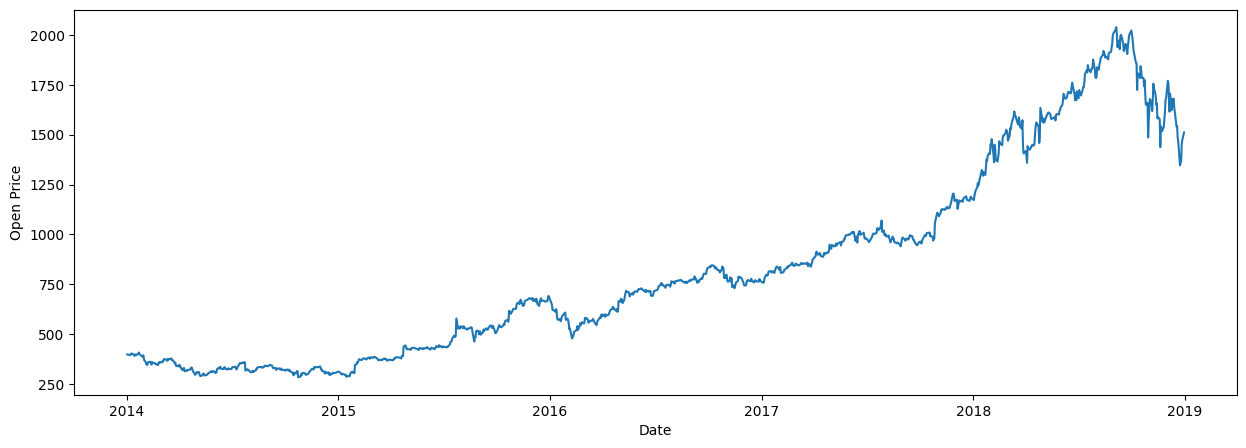

In [30]:
plt.figure(figsize = (15,5))
plt.plot(dataset)

plt.xlabel("Date")
plt.ylabel("Open Price")
plt.show()

### Train and test split

In [31]:
len(dataset)

1258

In [32]:
round(len(dataset) * 0.8)

1006

In [33]:
len(dataset) -round(len(dataset) * 0.8)

252

In [34]:
train_dataset = dataset.iloc[0:round(len(dataset) * 0.8)]

In [35]:
train_dataset

,Open
Date,
2014-01-02,398.799988
2014-01-03,398.290009
2014-01-06,395.850006
2014-01-07,395.040009
2014-01-08,398.470001
...,...
2017-12-21,1175.900024
2017-12-22,1172.079956
2017-12-26,1168.359985


In [36]:
test_dataset = dataset.iloc[round(len(dataset) * 0.8): ]

In [37]:
test_dataset

,Open
Date,
2017-12-29,1182.349976
2018-01-02,1172.000000
2018-01-03,1188.300049
2018-01-04,1205.000000
2018-01-05,1217.510010
...,...
2018-12-24,1346.000000
2018-12-26,1368.890015
2018-12-27,1454.199951


### Min Max Scaler

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
sc = MinMaxScaler()

In [40]:
train_dataset = sc.fit_transform(train_dataset)

In [41]:
test_dataset = sc.transform(test_dataset)

### Prepare the data for RNN model

In [42]:
train_dataset

array([[0.12428297],
       [0.12372894],
       [0.12107814],
       ...,
       [0.96032503],
       [0.97287288],
       [0.98274813]])

In [43]:
X_train = []
y_train = []

In [44]:
num_of_days = 60

In [45]:
for i in range(num_of_days, len(train_dataset)):

    X_train.append(train_dataset[i-num_of_days:i,:])
    y_train.append(train_dataset[i,:])

In [46]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [47]:
X_train.shape

(946, 60, 1)

In [48]:
y_train.shape

(946, 1)

### Build the RNN Architecture

In [49]:
from tensorflow.keras import Sequential

In [50]:
from tensorflow.keras.layers import Input, GRU, Dense

### Init the Model

In [51]:
gru_model = Sequential()

#### Add the input layer

In [52]:
inp_layer = Input(shape = (60, 1))

In [53]:
gru_model.add(inp_layer)

#### Add the Simple RNN Layer

In [54]:
#kernel_initializer -- init strategy for weights
#recurrent_initializer -- init strategy for recurrent weights
#return_sequences -- to return sequential output --
#True -- return sequence, False -- Return vector
#units -- no of neurons in layer
gru_layer_1 = GRU(kernel_initializer = "glorot_uniform",
                  recurrent_initializer = "glorot_uniform",
                  return_sequences = True,
                  units = 100)

In [55]:
gru_model.add(gru_layer_1)

In [56]:
gru_layer_2 = GRU(kernel_initializer = "glorot_uniform",
                        recurrent_initializer = "glorot_uniform",
                        return_sequences = False,
                        units = 50)

In [57]:
gru_model.add(gru_layer_2)

### Add output layer

In [58]:
output_layer = Dense(kernel_initializer = "glorot_uniform",
                    activation = "linear",
                     units = 1 ) #regression problem

In [59]:
gru_model.add(output_layer)

In [60]:
gru_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 60, 100)             │          30,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          22,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,751 (209.96 KB)

 Trainable params: 53,751 (209.96 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
from tensorflow.keras.utils import plot_model

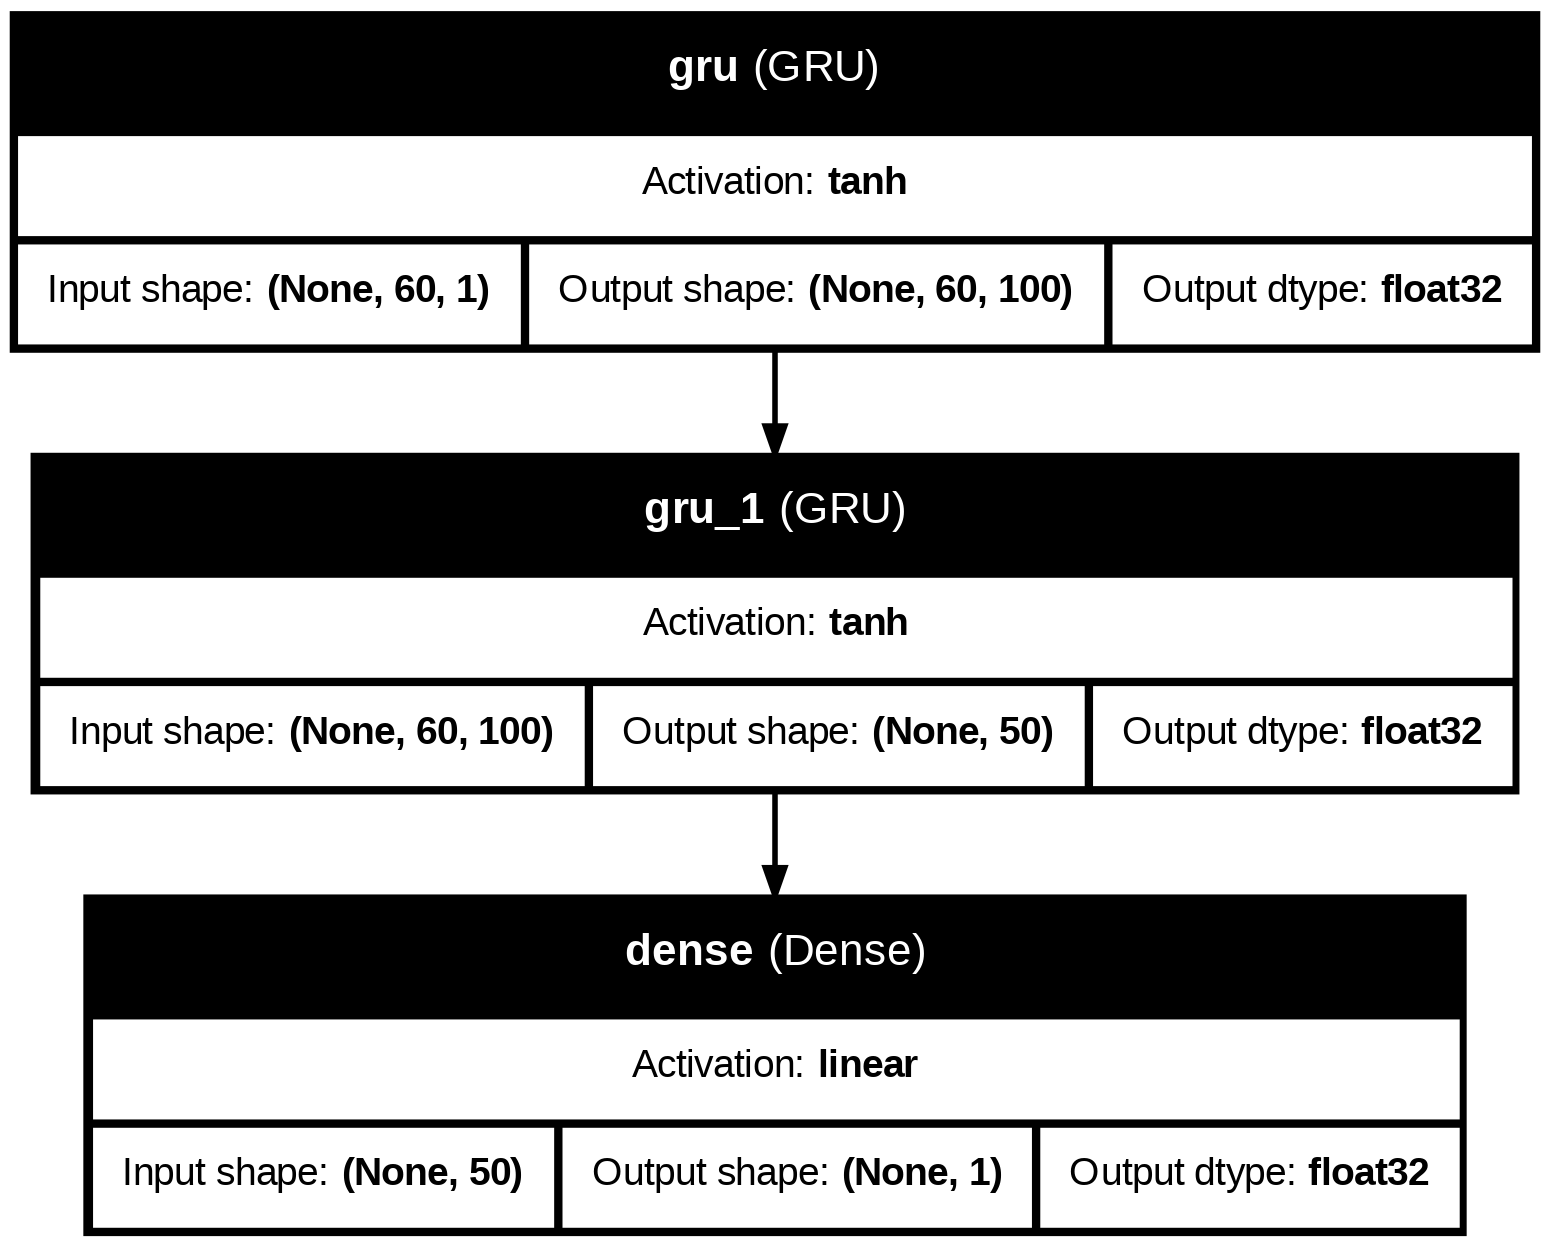

In [62]:
plot_model(gru_model,
           show_shapes =  True,
       show_layer_names = True,
          show_dtype = True,show_layer_activations = True, expand_nested  = True )

In [63]:
import tensorflow as tf
from tensorflow.keras.metrics import Metric

In [64]:
class RMSEMetric(Metric): #inherit class Metric
    def __init__(self, name="rmse", **kwargs):
        super(RMSEMetric, self).__init__(name=name, **kwargs)
        self.sum_squared_errors = self.add_weight(name="sse", initializer="zeros")
        self.count = self.add_weight(name="count", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        error = tf.math.squared_difference(y_true, y_pred)
        if sample_weight is not None:
            error = tf.multiply(error, sample_weight)
        self.sum_squared_errors.assign_add(tf.reduce_sum(error))
        self.count.assign_add(tf.cast(tf.size(y_true), dtype=self.count.dtype))

    def result(self):
        return tf.sqrt(self.sum_squared_errors / self.count)

    def reset_state(self):
        self.sum_squared_errors.assign(0.0)
        self.count.assign(0.0)

In [65]:
gru_model.compile(loss = "mse", optimizer = "adam", metrics = [RMSEMetric()])

### Train the model

In [66]:
gru_model.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.1048 - rmse: 0.3069
Epoch 2/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 3/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - loss: 4.4382e-04 - rmse: 0.0210
Epoch 4/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 3.6995e-04 - rmse: 0.0192
Epoch 5/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 3.4912e-04 - rmse: 0.0187
Epoch 6/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 3.1024e-04 - rmse: 0.0176
Epoch 7/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - loss: 3.1727e-04 - rmse: 0.0178
Epoch 8/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 3.0340e-04 - rmse: 0.0174
Epoch 9/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 3.1283e-04 - rmse: 0.0177
Epoch 10/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 3.0030e-04 - rmse: 0.0173
Epoch 11/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 2.5603e-04 - rmse: 0.0159
Epoch 12/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 3.0780e-0

## Predictions

In [67]:
len(test_dataset)

252

In [68]:
test_data = np.concatenate((train_dataset[-60:], test_dataset), axis = 0)

In [69]:
test_data

array([[0.72767471],
       [0.74482878],
       [0.75095604],
       [0.77007647],
       [0.77380278],
       [0.76793631],
       [0.77395489],
       [0.7850252 ],
       [0.7865896 ],
       [0.78349342],
       [0.78749133],
       [0.76655658],
       [0.77039156],
       [0.76300406],
       [0.74374239],
       [0.7535199 ],
       [0.75605121],
       [0.84058319],
       [0.88063837],
       [0.89583695],
       [0.89192597],
       [0.88368031],
       [0.87644492],
       [0.89599993],
       [0.91293671],
       [0.9108508 ],
       [0.91426208],
       [0.91441419],
       [0.91104641],
       [0.91877062],
       [0.91540284],
       [0.91882499],
       [0.92764647],
       [0.91840129],
       [0.92175819],
       [0.93060142],
       [0.95200324],
       [0.99758825],
       [1.        ],
       [0.98904924],
       [0.95895617],
       [0.96433387],
       [0.9662893 ],
       [0.91676083],
       [0.92733138],
       [0.9475382 ],
       [0.9625413 ],
       [0.956

In [70]:
X_test = []
y_test = []

In [71]:
for i in range(num_of_days, len(test_data)):

    X_test.append(test_data[i-num_of_days:i,:])
    y_test.append(test_data[i,:])

In [72]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [73]:
X_test.shape

(252, 60, 1)

In [74]:
y_pred = gru_model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


In [75]:
y_pred

array([[0.9744605 ],
       [0.97635376],
       [0.97295743],
       [0.97580534],
       [0.9852589 ],
       [0.9975033 ],
       [1.0130293 ],
       [1.0316862 ],
       [1.0397298 ],
       [1.0482966 ],
       [1.0590636 ],
       [1.0855602 ],
       [1.1012387 ],
       [1.1018121 ],
       [1.1062235 ],
       [1.1038284 ],
       [1.1169876 ],
       [1.1426779 ],
       [1.158461  ],
       [1.1759363 ],
       [1.1938585 ],
       [1.2025354 ],
       [1.2254169 ],
       [1.2393993 ],
       [1.2594004 ],
       [1.2422582 ],
       [1.2087564 ],
       [1.2202048 ],
       [1.2274408 ],
       [1.2086767 ],
       [1.1890562 ],
       [1.1852038 ],
       [1.1938102 ],
       [1.2258189 ],
       [1.2460109 ],
       [1.2518913 ],
       [1.268468  ],
       [1.2845228 ],
       [1.2941024 ],
       [1.3043431 ],
       [1.3167795 ],
       [1.3225046 ],
       [1.3223145 ],
       [1.302893  ],
       [1.2981906 ],
       [1.3136373 ],
       [1.323683  ],
       [1.338

In [76]:
y_test

array([[0.97552361],
       [0.9642795 ],
       [0.98198771],
       [1.00013036],
       [1.01372111],
       [1.03380844],
       [1.05651401],
       [1.04374893],
       [1.05959932],
       [1.07442857],
       [1.12832435],
       [1.11663478],
       [1.09676467],
       [1.11637406],
       [1.10026295],
       [1.14471793],
       [1.184621  ],
       [1.17721188],
       [1.20329611],
       [1.22194947],
       [1.21542026],
       [1.2677082 ],
       [1.26086389],
       [1.29605207],
       [1.21482269],
       [1.17010685],
       [1.26520945],
       [1.24422046],
       [1.18317615],
       [1.17359425],
       [1.19669091],
       [1.21876629],
       [1.28464498],
       [1.27430252],
       [1.2624826 ],
       [1.30431948],
       [1.31557446],
       [1.31555271],
       [1.33061005],
       [1.34723187],
       [1.3418108 ],
       [1.3353902 ],
       [1.28704585],
       [1.31435771],
       [1.35668341],
       [1.3494264 ],
       [1.37493481],
       [1.389

In [77]:
y_pred = sc.inverse_transform(y_pred)

In [78]:
y_test = sc.inverse_transform(y_test)

In [79]:
y_pred

array([[1181.3715],
       [1183.1141],
       [1179.9878],
       [1182.6093],
       [1191.311 ],
       [1202.5819],
       [1216.8733],
       [1234.0465],
       [1241.4506],
       [1249.336 ],
       [1259.2468],
       [1283.6365],
       [1298.0682],
       [1298.5961],
       [1302.6566],
       [1300.452 ],
       [1312.5648],
       [1336.2122],
       [1350.7402],
       [1366.8259],
       [1383.3229],
       [1391.3098],
       [1412.3718],
       [1425.2423],
       [1443.6528],
       [1427.8739],
       [1397.0361],
       [1407.5742],
       [1414.2347],
       [1396.9628],
       [1378.9025],
       [1375.3564],
       [1383.2784],
       [1412.7418],
       [1431.3281],
       [1436.7408],
       [1451.9995],
       [1466.7776],
       [1475.5955],
       [1485.0217],
       [1496.4692],
       [1501.7391],
       [1501.5641],
       [1483.687 ],
       [1479.3585],
       [1493.5769],
       [1502.8237],
       [1516.4773],
       [1530.4696],
       [1549.9127],


In [80]:
y_test

array([[1182.349976],
       [1172.      ],
       [1188.300049],
       [1205.      ],
       [1217.51001 ],
       [1236.      ],
       [1256.900024],
       [1245.150024],
       [1259.73999 ],
       [1273.390015],
       [1323.      ],
       [1312.23999 ],
       [1293.949951],
       [1312.      ],
       [1297.170044],
       [1338.089966],
       [1374.819946],
       [1368.      ],
       [1392.01001 ],
       [1409.180054],
       [1403.170044],
       [1451.300049],
       [1445.      ],
       [1477.390015],
       [1402.619995],
       [1361.459961],
       [1449.      ],
       [1429.680054],
       [1373.48999 ],
       [1364.670044],
       [1385.930054],
       [1406.25    ],
       [1466.890015],
       [1457.369995],
       [1446.48999 ],
       [1485.      ],
       [1495.359985],
       [1495.339966],
       [1509.199951],
       [1524.5     ],
       [1519.51001 ],
       [1513.599976],
       [1469.099976],
       [1494.23999 ],
       [1533.199951],
       [15

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [82]:
mse = mean_squared_error(y_test, y_pred)

In [83]:
mse

3114.1357978932638

In [84]:
rmse = np.sqrt(mse)

In [85]:
rmse

np.float64(55.8044424566115)

On averge there is deviation of 46$ between the actual stock price and predicted stock price

1. we can expect a error of around 46 $ in prediction

In [86]:
mean_absolute_error(y_test, y_pred)

46.20906380936876

In [87]:
test_data_dates = dataset.iloc[round(len(dataset) * 0.8): ].index

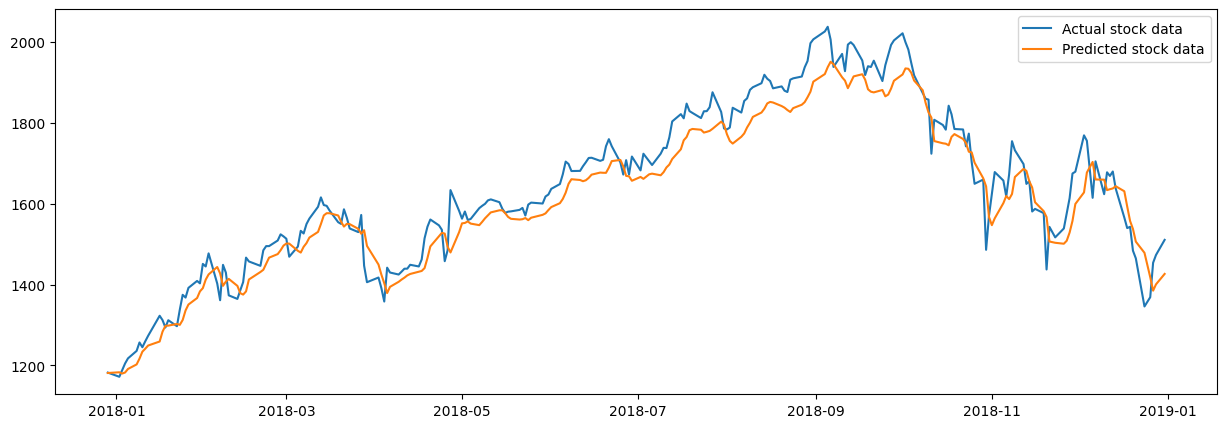

In [88]:
plt.figure(figsize = (15,5))
plt.plot(test_data_dates, y_test, label = "Actual stock data")
plt.plot(test_data_dates, y_pred, label = "Predicted stock data")
plt.legend()
plt.show()

### Save the model

In [89]:
gru_model.save("amazon_stock_model_gru.keras")

### Save the scaler object

In [90]:
import joblib

In [91]:
joblib.dump(sc, "amazon_stock_sc.pkl")

['amazon_stock_sc.pkl']